# SMS Spam Classification

This Project illustrates classification of SMS as SPAM or NOT SPAM.

#### Installing Dependicies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("C://Users//Varsha//Downloads//spam_data.csv")

In [5]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Preprocessing and Exploring the Dataset

In [7]:
sms_data=df.where((pd.notnull(df)),'')

In [8]:
sms_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
sms_data.shape

(5572, 2)

In [10]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
sms_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
sms_data.loc[sms_data['Category']=='spam','Category',]=0

In [13]:
sms_data.loc[sms_data['Category']=='ham','Category',]=1

In [14]:
X=sms_data['Message']
Y=sms_data['Category']

In [15]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [16]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

### Training and spliting the dataset

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2 ,random_state=3)


In [18]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [19]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


#### Feature Engineering

In [20]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words=['english'],lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

In [21]:
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [22]:
 print(X_train_features) 

  (0, 5590)	0.5690977835360829
  (0, 3402)	0.3962142772134919
  (0, 4593)	0.38274870785912624
  (0, 2284)	0.37929420133365177
  (0, 3933)	0.31933689575195645
  (0, 2390)	0.3560972364184373
  (1, 4205)	0.14850870903418734
  (1, 7499)	0.12575231570549783
  (1, 3285)	0.23356742056200896
  (1, 3433)	0.24863888769921966
  (1, 1576)	0.1489850750114476
  (1, 3053)	0.26729930485517817
  (1, 6816)	0.204883965246415
  (1, 2831)	0.26729930485517817
  (1, 937)	0.17990063081071436
  (1, 1894)	0.2190517171449065
  (1, 2920)	0.10557329754151569
  (1, 4282)	0.21200560457680895
  (1, 3714)	0.09972295238987999
  (1, 7446)	0.1695584988160503
  (1, 4908)	0.14874604136205302
  (1, 6768)	0.11349051404862
  (1, 6238)	0.11876886576185115
  (1, 2844)	0.2537790500257035
  (1, 7659)	0.2183037355553489
  :	:
  (4455, 3994)	0.28007076122039465
  (4455, 4870)	0.27669278863530977
  (4455, 4800)	0.1634263438044151
  (4455, 7147)	0.17690260531267968
  (4455, 3606)	0.13292987710754373
  (4455, 4046)	0.28185851076945057

In [23]:
print(X_train_features.shape) 

(4457, 7693)


In [24]:
print(X_test_features)

  (0, 7659)	0.11777529546677937
  (0, 7653)	0.08124331849626527
  (0, 7527)	0.18247773253717986
  (0, 7151)	0.19346519380979824
  (0, 6891)	0.07955148779946085
  (0, 6810)	0.1389235315401166
  (0, 6771)	0.09603105933365308
  (0, 5550)	0.2224817452513718
  (0, 5387)	0.1870126073132054
  (0, 4903)	0.12485623031466579
  (0, 4766)	0.13607621492454494
  (0, 4519)	0.17260364803223566
  (0, 3714)	0.10760145860683062
  (0, 1600)	0.24888954643504357
  (0, 1592)	0.12062906802721217
  (0, 1453)	0.2987676436541797
  (0, 1407)	0.2363576660162618
  (0, 1114)	0.23051032565855334
  (0, 1072)	0.263477954675303
  (0, 405)	0.2239504978254755
  (0, 306)	0.22548176899350855
  (0, 20)	0.288417003284871
  (0, 14)	0.2520201672053349
  (0, 9)	0.2682823396385024
  (0, 1)	0.2239504978254755
  :	:
  (1112, 4766)	0.16091012094821885
  (1112, 4297)	0.26663218653224996
  (1112, 3733)	0.18331683636357654
  (1112, 2390)	0.1949517478756202
  (1112, 1737)	0.32380230720072434
  (1112, 1592)	0.14264387010538784
  (1112, 1

In [25]:
print(X_test_features.shape)

(1115, 7693)


#### Model Engineering

In [26]:
model=LogisticRegression()

In [27]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [28]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [29]:
print('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 0.9730760601301324


In [30]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [31]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9775784753363229


In [32]:
predictions = model.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
classification_rep = classification_report(Y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9775784753363229
Confusion Matrix:
[[130  25]
 [  0 960]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



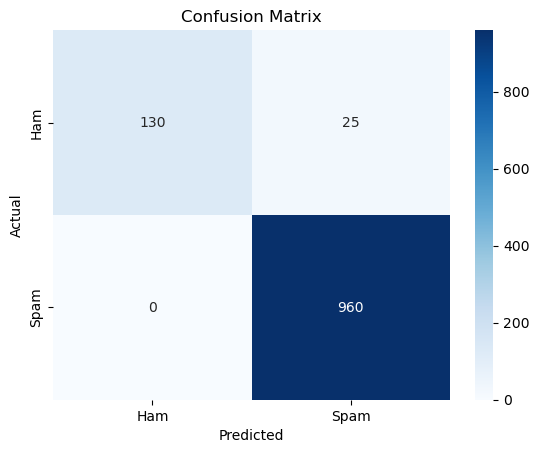

In [33]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Final Test

In [34]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [35]:
input_mail = ["WOW! The Boys R Back. TAKE THAT 2007 UK Tour. Win VIP Tickets & pre-book with VIP Club. Txt CLUB to 81303. Trackmarque Ltd info@vipclub4u."]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
